# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [6]:
dfloan = pd.read_csv('loan_data.csv')
dfloan.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [7]:
dfloan.tail(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9568,0,all_other,0.1979,37.06,10.645425,22.17,667,5916.000000,28854,59.8,6,0,1,0
9569,0,home_improvement,0.1426,823.34,12.429216,3.62,722,3239.958333,33575,83.9,5,0,0,1
9570,0,all_other,0.1671,113.63,10.645425,28.06,672,3210.041667,25759,63.8,5,0,0,1
9571,0,all_other,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,1
9572,0,debt_consolidation,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


** Check out the info(), head(), and describe() methods on loans.**

In [3]:
dfloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

In [8]:
dfloan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
dfloan[dfloan['int.rate'] == dfloan['int.rate'].max()]
#terlihat high int rate tidak fully paid

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9549,0,home_improvement,0.2164,729.70,11.877569,8.63,667,8280.041667,55442,66.9,9,0,1,1
9566,0,all_other,0.2164,551.08,11.002100,24.06,662,1800.000000,16441,49.8,9,0,0,1


In [12]:
sum(dfloan[dfloan['revol.util'] > 100]['not.fully.paid'])

10

In [13]:
dfloan[dfloan['fico'] == 827]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1613,1,home_improvement,0.1051,390.09,11.918391,2.92,827,8763.0,84236,4.6,0,0,0,0


In [14]:
listItem = []
for col in dfloan.columns:
    listItem.append([col, dfloan[col].dtype, dfloan[col].isna().sum(),
                    round((dfloan[col].isna().sum()/len(dfloan[col])) * 100,2),
                    dfloan[col].nunique(), list(dfloan[col].unique()[:2])]);
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null',
                              'nullPct', 'unique', 'uniqueSample'],
                     data = listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,credit.policy,int64,0,0.0,2,"[1, 0]"
1,purpose,object,0,0.0,7,"[debt_consolidation, credit_card]"
2,int.rate,float64,0,0.0,249,"[0.1189, 0.1071]"
3,installment,float64,0,0.0,4788,"[829.1, 228.22]"
4,log.annual.inc,float64,0,0.0,1987,"[11.35040654, 11.08214255]"
5,dti,float64,0,0.0,2529,"[19.48, 14.29]"
6,fico,int64,0,0.0,44,"[737, 707]"
7,days.with.cr.line,float64,0,0.0,2687,"[5639.958333, 2760.0]"
8,revol.bal,int64,0,0.0,7869,"[28854, 33623]"
9,revol.util,float64,0,0.0,1035,"[52.1, 76.7]"


In [16]:
dfloan[dfloan['inq.last.6mths'] == 33]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.0,26531,52.6,33,0,0,1


In [17]:
dfloan['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

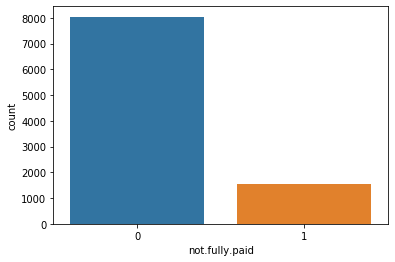

In [18]:
sns.countplot('not.fully.paid', data=dfloan)

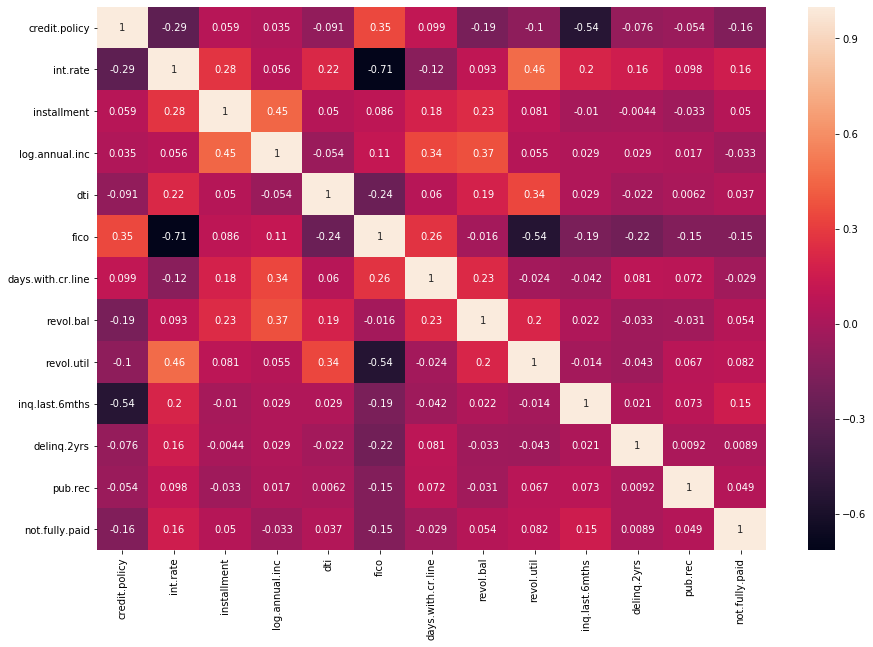

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(dfloan.corr(), annot=True)

Text(0.5, 0, 'FICO')

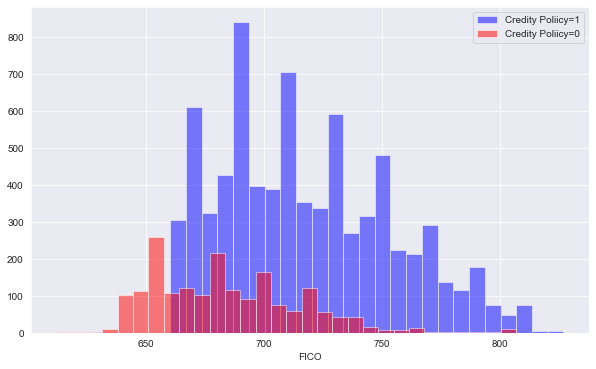

In [27]:
plt.figure(figsize=(10,6))
dfloan[dfloan['credit.policy']==1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Credity Poliicy=1')
dfloan[dfloan['credit.policy']==0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Credity Poliicy=0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

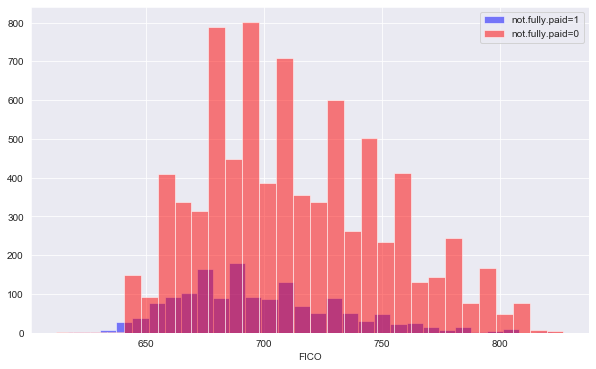

In [28]:
plt.figure(figsize=(10,6))
dfloan[dfloan['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
dfloan[dfloan['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='red', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

Text(0.5, 0, 'days.with.cr.line')

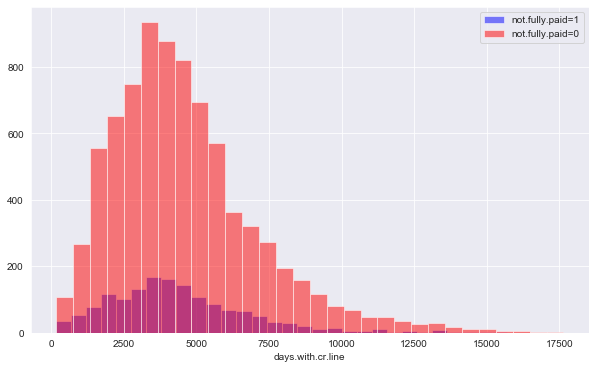

In [33]:
plt.figure(figsize=(10,6))
dfloan[dfloan['not.fully.paid']==1]['days.with.cr.line'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
dfloan[dfloan['not.fully.paid']==0]['days.with.cr.line'].hist(bins=30, alpha=0.5, color='red', label='not.fully.paid=0')
plt.legend()
plt.xlabel('days.with.cr.line')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

Text(0.5, 0, 'revol.bal')

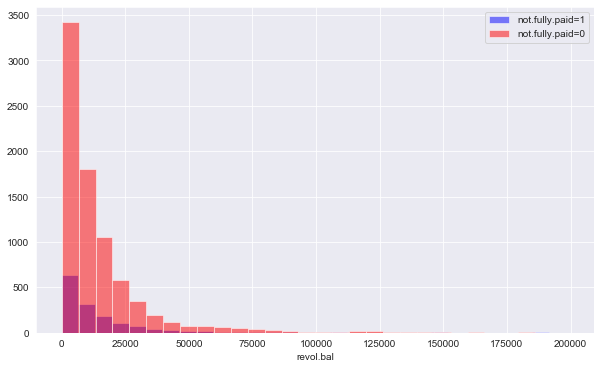

In [36]:
plt.figure(figsize=(10,6))
dfloan[(dfloan['not.fully.paid']==1) & (dfloan['revol.bal'] < 200000)]['revol.bal'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
dfloan[(dfloan['not.fully.paid']==0) & (dfloan['revol.bal'] < 200000)]['revol.bal'].hist(bins=30, alpha=0.5, color='red', label='not.fully.paid=0')
plt.legend()
plt.xlabel('revol.bal')

In [32]:
dfloan[dfloan['revol.bal'] > 1000000]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9535,0,small_business,0.1496,831.52,12.765688,11.38,717,8520.041667,1207359,56.0,7,0,0,1


Text(0.5, 0, 'revol.bal')

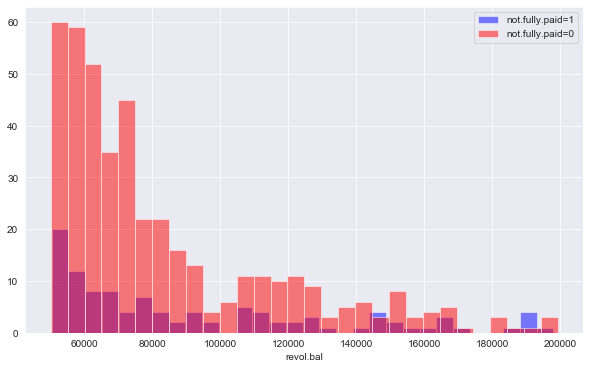

In [37]:
plt.figure(figsize=(10,6))
dfloan[(dfloan['not.fully.paid']==1) & (dfloan['revol.bal'] < 200000) & (dfloan['revol.bal'] > 50000)]['revol.bal'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
dfloan[(dfloan['not.fully.paid']==0) & (dfloan['revol.bal'] < 200000) & (dfloan['revol.bal'] > 50000)]['revol.bal'].hist(bins=30, alpha=0.5, color='red', label='not.fully.paid=0')
plt.legend()
plt.xlabel('revol.bal')

Text(0.5, 0, 'revol.util')

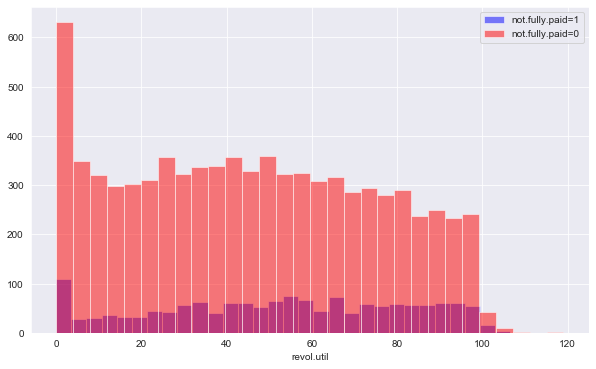

In [38]:
plt.figure(figsize=(10,6))
dfloan[dfloan['not.fully.paid']==1]['revol.util'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
dfloan[dfloan['not.fully.paid']==0]['revol.util'].hist(bins=30, alpha=0.5, color='red', label='not.fully.paid=0')
plt.legend()
plt.xlabel('revol.util')

Text(0.5, 0, 'revol.util')

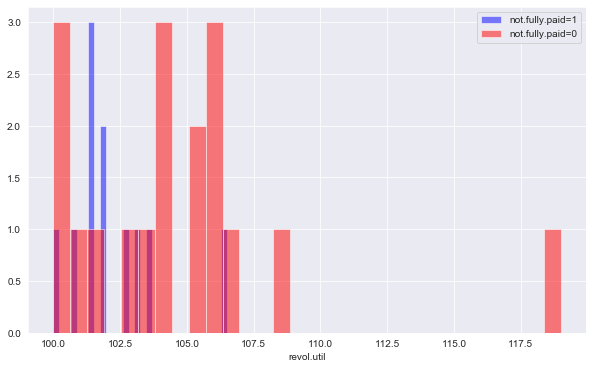

In [40]:
plt.figure(figsize=(10,6))
dfloan[(dfloan['not.fully.paid']==1) & (dfloan['revol.util'] >= 100)]['revol.util'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
dfloan[(dfloan['not.fully.paid']==0) & (dfloan['revol.util'] >= 100)]['revol.util'].hist(bins=30, alpha=0.5, color='red', label='not.fully.paid=0')
plt.legend()
plt.xlabel('revol.util')

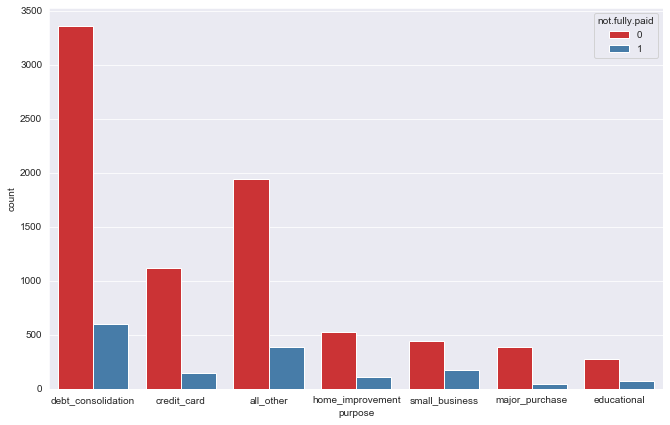

In [41]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=dfloan, palette='Set1')

In [92]:
notf = []
full = []

for i in dfloan['purpose'].unique():
    notf.append((len(dfloan[(dfloan['purpose'] == i) & (dfloan['not.fully.paid'] == 1) ])/len(dfloan[dfloan['purpose'] == i]))*100)
for i in dfloan['purpose'].unique():
    full.append((len(dfloan[(dfloan['purpose'] == i) & (dfloan['not.fully.paid'] == 0) ])/len(dfloan[dfloan['purpose'] == i]))*100)

dictPurpose = {'Purpose': purp, 'Fully Paid': full, 'Not-Fully Paid': notf}

In [93]:
dfPurpose = pd.DataFrame(data=dictPurpose)
dfPurpose.sort_values(by=['Fully Paid'])

,Purpose,Fully Paid,Not-Fully Paid
4,small_business,72.213247,27.786753
6,educational,79.883382,20.116618
3,home_improvement,82.988871,17.011129
2,all_other,83.397683,16.602317
0,debt_consolidation,84.761183,15.238817
1,credit_card,88.431062,11.568938
5,major_purchase,88.787185,11.212815


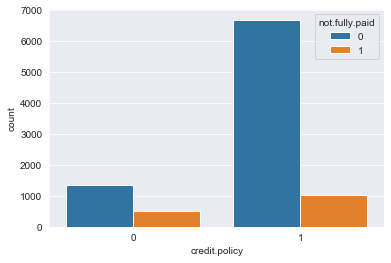

In [95]:
sns.countplot(x='credit.policy', hue='not.fully.paid', data=dfloan)

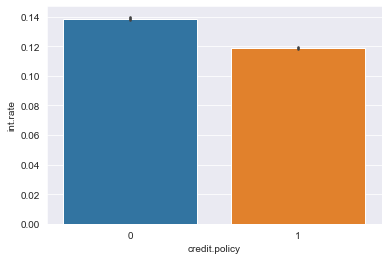

In [96]:
sns.barplot(x='credit.policy', y='int.rate', data =dfloan, estimator=np.mean)

In [100]:
dfloan.groupby('credit.policy')['int.rate'].mean()

credit.policy
0    0.138680
1    0.118754
Name: int.rate, dtype: float64

In [102]:
dfloan.groupby(['credit.policy', 'not.fully.paid'])['int.rate'].mean()

credit.policy  not.fully.paid
0              0                 0.137787
               1                 0.140998
1              0                 0.117342
               1                 0.128078
Name: int.rate, dtype: float64

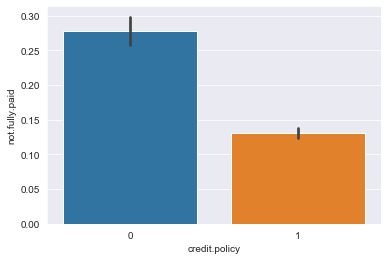

In [103]:
sns.barplot(x='credit.policy', y='not.fully.paid', data =dfloan, estimator=np.mean)

<Figure size 792x504 with 0 Axes>

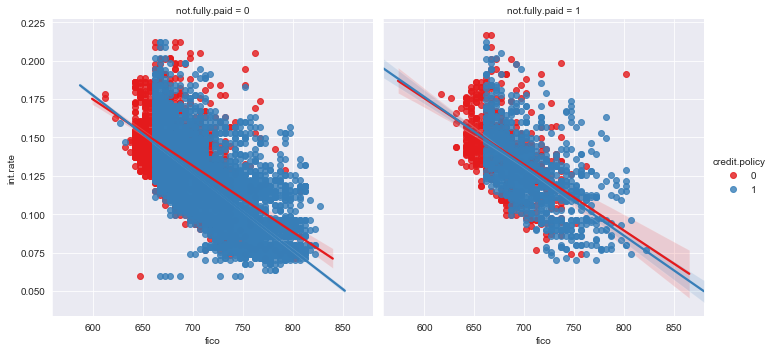

In [105]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate', x='fico', data=dfloan, hue='credit.policy', 
          col='not.fully.paid', palette='Set1')

# One Hot Encoding

In [106]:
final_data = pd.get_dummies(dfloan, columns=['purpose'], drop_first=True)

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [108]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [109]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [110]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [111]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('not.fully.paid', axis=1),
                                                   final_data['not.fully.paid'],
                                                   test_size=0.3)

# Train The Model

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rfc= RandomForestClassifier(n_estimators=100, random_state=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

# Feature Importances

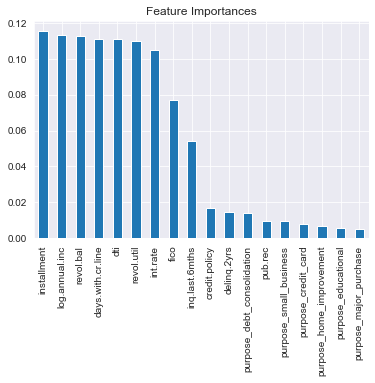

In [118]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

# Evaluate Model
### Training Error

In [120]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc, log_loss, roc_auc_score, f1_score

In [121]:
predictTrain = rfc.predict(X_train)

In [122]:
con = pd.DataFrame(data=confusion_matrix(y_train, predictTrain), columns=['P No', 'P Yes'],
                  index = ['A No', 'A Yes']);
print(con)

       P No  P Yes
A No   5613      0
A Yes     0   1091


In [123]:
print(classification_report(y_train, predictTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5613
           1       1.00      1.00      1.00      1091

    accuracy                           1.00      6704
   macro avg       1.00      1.00      1.00      6704
weighted avg       1.00      1.00      1.00      6704



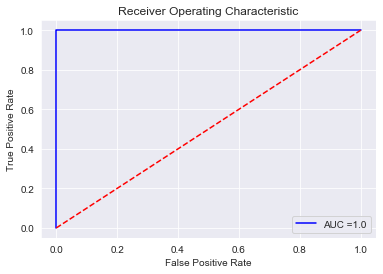

In [126]:
predictProbTrain = rfc.predict_proba(X_train)
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTrain[:,1]
fpr,tpr,threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

# merhod I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b', label ='AUC ={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0,1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Testing Error

In [128]:
predictTest = rfc.predict(X_test)

In [129]:
con = pd.DataFrame(data=confusion_matrix(y_test, predictTest), columns=['P No', 'P Yes'],
                  index = ['A No', 'A Yes']);
print(con)

       P No  P Yes
A No   2414     18
A Yes   428     14


In [130]:
print(classification_report(y_test, predictTest))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2432
           1       0.44      0.03      0.06       442

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.49      2874
weighted avg       0.79      0.84      0.78      2874



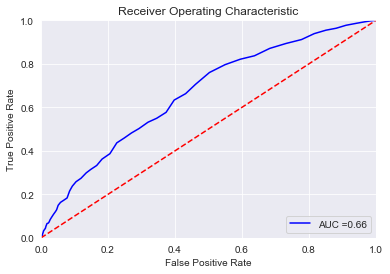

In [132]:
# calculate the fpr and tpr for all thresholds of the classification
predictProbTest = rfc.predict_proba(X_test)
preds = predictProbTest[:,1]
fpr,tpr,threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# merhod I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b', label ='AUC ={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [133]:
log_loss(y_test, predictProbTest[:,1])

0.4222218704783284

# Solving Imbalances Classification(EX 1)

In [141]:
from sklearn.model_selection import GridSearchCV

parameters = {'class_weight': ({0:1, 1:5},{0:1, 1:7},{0:1, 1:10}),
             'min_samples_leaf': (15,20,25)}
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
dt = GridSearchCV(rfc, parameters,
                 scoring=['recall','roc_auc'],
                 refit='recall', cv=5)
dt.fit(X_train, y_train)
dt.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 10},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=25,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [142]:
rfc = dt.best_estimator_

In [144]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
ros = RandomOverSampler(random_state=101)

X_ros, y_ros = ros.fit_sample(X_train, y_train)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [18]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

             precision    recall  f1-score   support

          0       0.85      0.81      0.83      2431
          1       0.16      0.20      0.18       443

avg / total       0.74      0.72      0.73      2874



[[1980  451]
 [ 355   88]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.56      0.01      0.02       443

avg / total       0.80      0.85      0.78      2874



**Show the Confusion Matrix for the predictions.**

[[2427    4]
 [ 438    5]]


**What performed better the random forest or the decision tree?**

# Great Job!